In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


Data collection and Processing

In [2]:
stroke_pred_df = pd.read_csv(r"C:\Users\chinm\OneDrive\Desktop\Data\healthcare-dataset-stroke-data.csv")
stroke_pred_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
stroke_pred_df.shape

(5110, 12)

In [4]:
stroke_pred_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
stroke_pred_df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [6]:
stroke_pred_df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [7]:
avg = stroke_pred_df['bmi'].mean()
stroke_pred_df2 =  stroke_pred_df.fillna(value=avg)

In [8]:
stroke_pred_df2.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [9]:
stroke_pred_df2.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [10]:
#Encoding
categorial = [var for var in stroke_pred_df2.columns if stroke_pred_df2[var].dtype=='O']

print('There are {} categorial varibles\n'.format(len(categorial)))

print('The categorial variables are :\n\n', categorial)

There are 5 categorial varibles

The categorial variables are :

 ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


In [11]:
stroke_pred_df2[categorial].head()

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
1,Female,Yes,Self-employed,Rural,never smoked
2,Male,Yes,Private,Rural,never smoked
3,Female,Yes,Private,Urban,smokes
4,Female,Yes,Self-employed,Rural,never smoked


In [12]:
stroke_pred_df2[categorial].value_counts()

gender  ever_married  work_type      Residence_type  smoking_status 
Female  Yes           Private        Urban           never smoked       279
                                     Rural           never smoked       268
Male    No            children       Urban           Unknown            172
        Yes           Private        Rural           never smoked       156
        No            children       Rural           Unknown            154
                                                                       ... 
Female  No            Self-employed  Rural           smokes               2
Male    No            children       Urban           smokes               1
Female  No            children       Rural           smokes               1
Male    No            Never_worked   Rural           never smoked         1
Other   No            Private        Rural           formerly smoked      1
Length: 118, dtype: int64

In [13]:
stroke_pred_df2[categorial].isnull().sum()

gender            0
ever_married      0
work_type         0
Residence_type    0
smoking_status    0
dtype: int64

In [14]:
 for var in categorial:
        print(stroke_pred_df2[var].value_counts())

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64
Yes    3353
No     1757
Name: ever_married, dtype: int64
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


In [15]:
stroke_pred_df2['gender'] = stroke_pred_df2['gender'].astype('category').cat.codes
stroke_pred_df2['ever_married'] = stroke_pred_df2['ever_married'].astype('category').cat.codes
stroke_pred_df2['work_type'] = stroke_pred_df2['work_type'].astype('category').cat.codes
stroke_pred_df2['Residence_type'] = stroke_pred_df2['Residence_type'].astype('category').cat.codes
stroke_pred_df2['smoking_status'] = stroke_pred_df2['smoking_status'].astype('category').cat.codes


In [16]:
stroke_pred_df2.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


In [17]:
stroke_pred_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   int8   
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   int8   
 6   work_type          5110 non-null   int8   
 7   Residence_type     5110 non-null   int8   
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   int8   
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), int8(5)
memory usage: 304.5 KB


In [19]:
stroke_pred_df2.shape

(5110, 12)

Separating or splitting features and the target

In [21]:
#From here actual ml things start
X = stroke_pred_df2.drop(['stroke'], axis=1)

Y = stroke_pred_df2['stroke']

In [23]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [24]:
print(X.shape, x_train.shape, x_test.shape)

(5110, 11) (4088, 11) (1022, 11)


Model Training

In [27]:
from sklearn.tree import DecisionTreeClassifier

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

clf_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

Model Evaluation

In [29]:
y_pred_gini = clf_gini.predict(x_test)

In [31]:
from sklearn.metrics import accuracy_score

print("Model accuracy score with criterian gini index: {0:0.4f}".format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterian gini index: 0.9462


In [33]:
print("Training set score:{0:0.4f}".format(clf_gini.score(x_train, y_train )))

print("Testing set score:{0:0.4f}".format(clf_gini.score(x_test, y_test )))

Training set score:0.9530
Testing set score:0.9462


Visualize decision tree

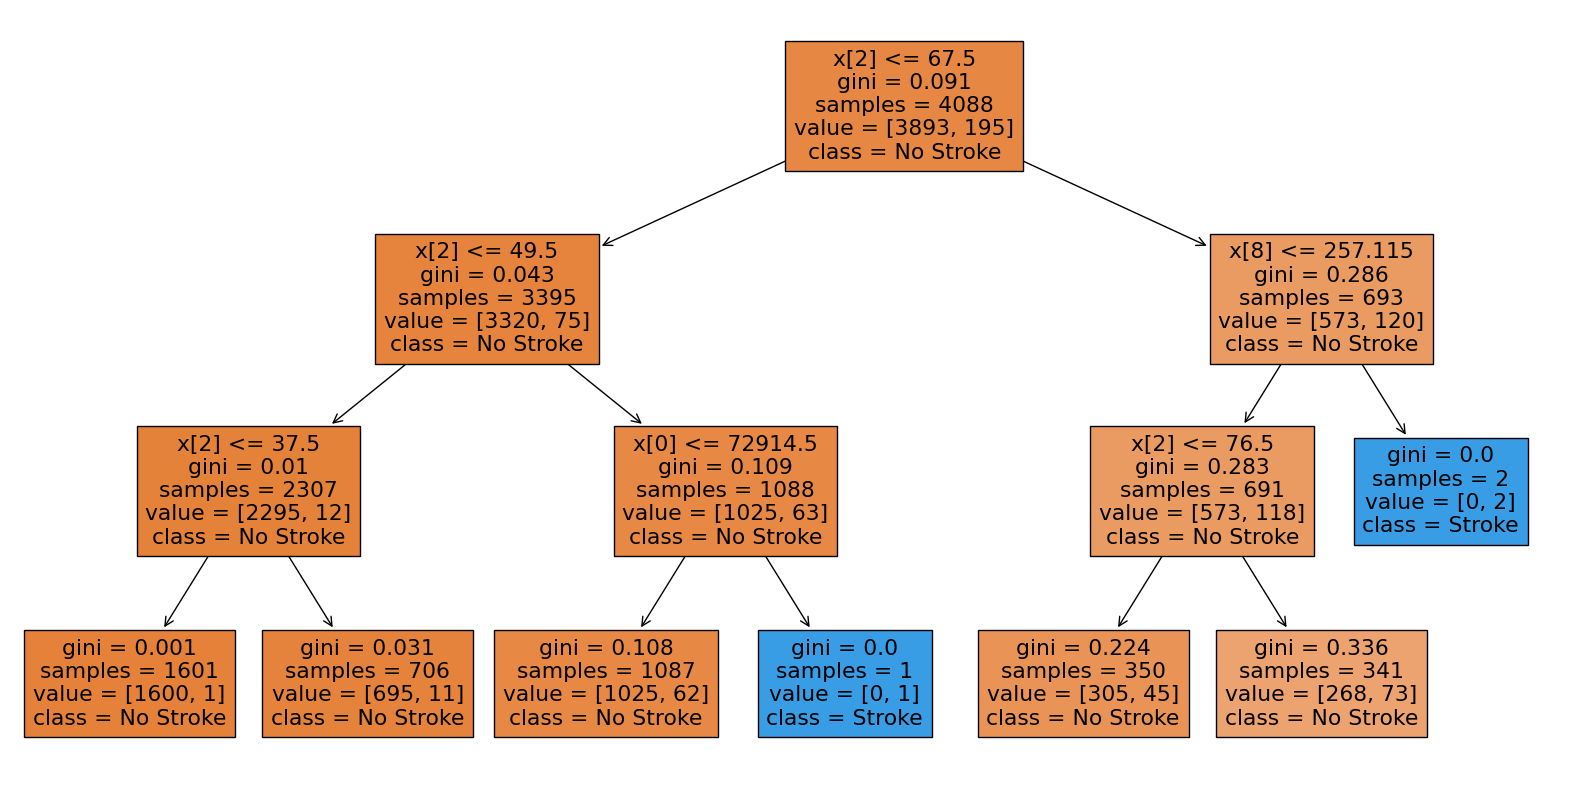

In [38]:
from sklearn.tree import plot_tree

#plotting the tree
plt.figure(figsize=(20,10))
plot_tree(clf_gini, class_names=['No Stroke','Stroke'],filled=True, max_depth=3)
plt.show()